<h2 align='center' style='color:blue'>Outlier Detection and Removal Using IQR</h2>

In [1]:
import pandas as pd
df = pd.read_csv("heights.csv")
df

,name,height
0,mohan,1.2
1,maria,2.3
2,sakib,4.9
3,tao,5.1
4,virat,5.2
5,khusbu,5.4
6,dmitry,5.5
7,selena,5.5
8,john,5.6
9,imran,5.6


In [2]:
df.describe()

,height
count,20.000000
mean,8.390000
std,8.782812
min,1.200000
25%,5.350000
50%,5.700000
75%,6.275000
max,40.200000


<h3 style='color:purple'>Detect outliers using IQR<h3>

In [3]:
# Q1 = df.height.quantile(0.25)
# Q3 = df.height.quantile(0.75)

Q1 = df.height.quantile(0.25)
Q3 = df.height.quantile(0.75)


Q1, Q3

(5.3500000000000005, 6.275)

In [4]:
IQR = Q3 - Q1
IQR

0.9249999999999998

In [5]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(3.962500000000001, 7.6625)

**Here are the outliers**

In [6]:
df[(df.height<lower_limit)|(df.height>upper_limit)]

,name,height
0,mohan,1.2
1,maria,2.3
17,aamir,14.5
18,ken,23.2
19,Liu,40.2


<h3 style='color:purple'>Remove outliers<h3>

In [7]:
df_no_outlier = df[(df.height>lower_limit)&(df.height<upper_limit)]
df_no_outlier.shape

(15, 2)

In [8]:
df_no_outlier

,name,height
2,sakib,4.9
3,tao,5.1
4,virat,5.2
5,khusbu,5.4
6,dmitry,5.5
7,selena,5.5
8,john,5.6
9,imran,5.6
10,jose,5.8
11,deepika,5.9


In [9]:
import seaborn as sns

C:\Users\Shubham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='height'>

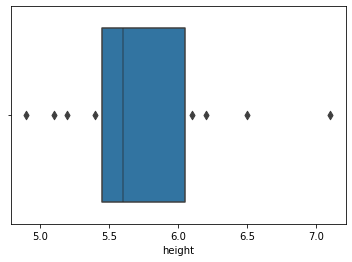

In [12]:
sns.boxenplot(df_no_outlier.height)